In [36]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import math
from scipy.stats import t,norm

In [3]:
datafile = '../../dataset/ch05/bodyfat.txt'
data = pd.read_csv(datafile, sep='\t')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Density  250 non-null    float64
 1   Pct.BF   250 non-null    float64
 2   Age      250 non-null    int64  
 3   Weight   250 non-null    float64
 4   Height   250 non-null    float64
 5   Neck     250 non-null    float64
 6   Chest    250 non-null    float64
 7   Abdomen  250 non-null    float64
 8   Waist    250 non-null    float64
 9   Hip      250 non-null    float64
 10  Thigh    250 non-null    float64
 11  Knee     250 non-null    float64
 12  Ankle    250 non-null    float64
 13  Bicep    250 non-null    float64
 14  Forearm  250 non-null    float64
 15  Wrist    250 non-null    float64
dtypes: float64(15), int64(1)
memory usage: 31.4 KB


In [5]:
data.head()

,Density,Pct.BF,Age,Weight,Height,Neck,Chest,Abdomen,Waist,Hip,Thigh,Knee,Ankle,Bicep,Forearm,Wrist
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,33.543307,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,32.677165,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,34.606299,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,34.015748,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,39.370079,101.9,63.2,42.2,24.0,32.2,27.7,17.7


In [6]:
waist = data['Waist']

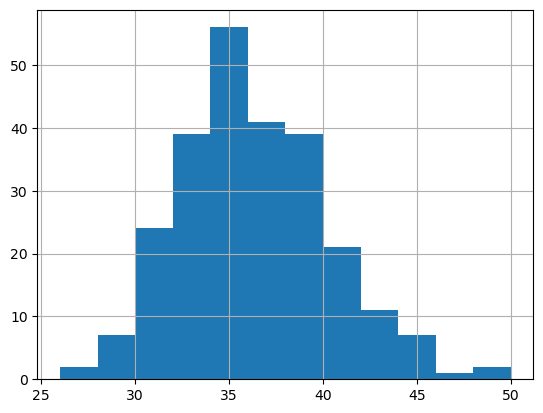

In [12]:
waist.hist(bins=list(range(26,51,2)));

In [13]:
samples = []
for i in range(1000):
    samples.append(waist.sample(n=2, replace=True))

In [14]:
sample_means = pd.DataFrame([s.mean() for s in samples])

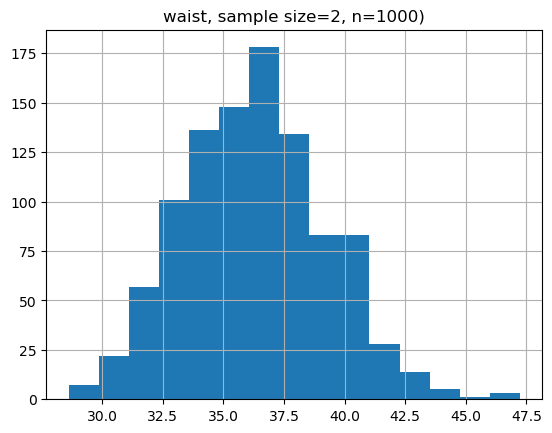

In [15]:
sample_means.hist(bins=15);
plt.title('waist, sample size=2, n=1000)');

In [16]:
samples = []
for i in range(1000):
    samples.append(waist.sample(n=5, replace=True))

In [17]:
sample_means = pd.DataFrame([s.mean() for s in samples])

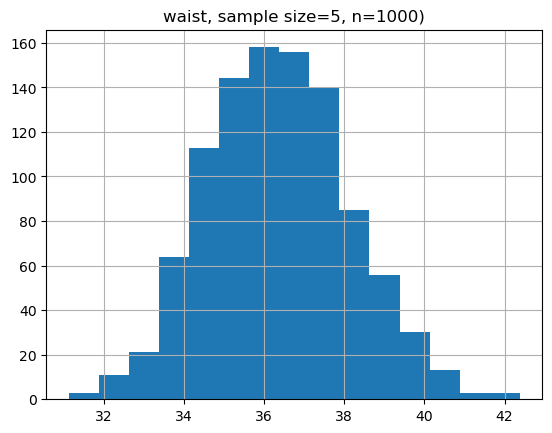

In [18]:
sample_means.hist(bins=15);
plt.title('waist, sample size=5, n=1000)');

In [19]:
samples = []
for i in range(1000):
    samples.append(waist.sample(n=10, replace=True))

In [20]:
sample_means = pd.DataFrame([s.mean() for s in samples])

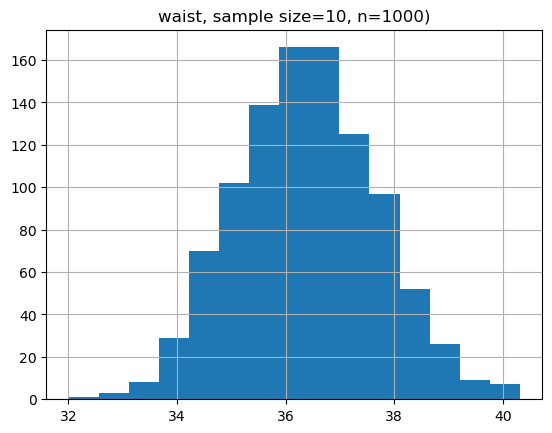

In [21]:
sample_means.hist(bins=15);
plt.title('waist, sample size=10, n=1000)');

In [22]:
samples = []
for i in range(1000):
    samples.append(waist.sample(n=20, replace=True))

In [23]:
sample_means = pd.DataFrame([s.mean() for s in samples])

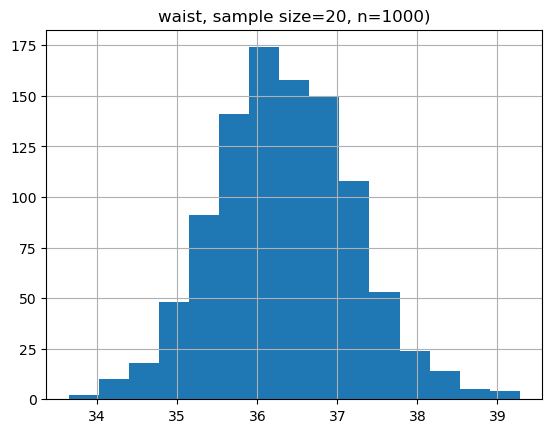

In [24]:
sample_means.hist(bins=15);
plt.title('waist, sample size=20, n=1000)');

**Prob.43** Waist size A study measured the Waist Size of 250 men, finding a mean of 36.33 inches and a standard deviation of 4.02 inches. Here is a histogram of these measurements: (Data in Bodyfat)

(a) Describe the histogram of Waist Size.

**(Compared to the CEO data in problems 44 and 46)  This data set looks much more compliant.  The population histogram is symmetric, unimodal, and without any obvious outliers.  We expect a random sample drawn from this population would follow approximately normal distribution, even if the sample size is not too large.**

(b) To explore how the mean might vary from sample to sample,
they simulated by drawing many samples of size 2, 5, 10, and 20, with replacement, from the 250 measurements. Here are histograms of the sample means for each simulation. Explain how these histograms demonstrate what the Central Limit Theorem says about the sampling distribution model for sample means.

**We observed that the histograms all look symmetric and well-behaved, approximating normal distributions.  Even for the smallest sample size of 2, we might be able to use the sample mean to construct a t-interval for the population mean.**

**Answer to (a)**

Shape: the histogram is unimodal, symmetric and right skewed.

Center: its center approximately at 34 to 37.

Spread: values are kind of close to the mean.

**Answer to (b)

Sample size of 2: the histogram is unimodal, symmetric, and right skewed.  Its center at approximately 33 to 34.  Values are close to the mean.

Sample size of 5: the histogram is unimodal and symmetric. Its center at approximately 36 to 37. Values are close to the mean.

Sample size of 10: the histogram is unimodal and symmetric.  Its center at about 35 to 36,  Value are very close to the mean.

Sample size of 20: the histogram is unimodal and symmetric.  Its center at around 36 to 36.5.  Values are clustered closely to the mean.

**Prob.45** Waist size, revisited Researchers measured the Waist Sizes of 250 men in a study on body fat. The true mean and standard de- viation of the Waist Sizes for the 250 men are 36.33 inches and 4.019 inches, respectively. In Exercise 43, you looked at the histograms of simulations that drew samples of sizes 2, 5, 10, and 20 (with replacement). The summary statistics for these simulations were as follows:

(a) According to the Central Limit Theorem, what should the theoretical mean and standard deviation be for each of these sample sizes?

(b) How close are the theoretical values to what was observed in the simulation?

(c) Looking at the histograms in Exercise 43, at what sample size would you be comfortable using the Normal model as an approximation for the sampling distribution?

(d) What about the shape of the distribution of Waist Size explains your choice of sample size in part c?

**Answer to (a)**

sample size = 2: the mean is as same as the sample size of 5 and it is lesser close to the population mean compare to the other two sample sizes. The standard deviation is approximate $\sqrt{\frac{1}{2}}$ of the population standard deviation.

sample size = 5: the mean is s as same as the sample size of 2 and it is lesser close to the population mean compare to the other two sample sizes.  The standard deviation is $\sqrt{\frac{1}{5}}$ of the population standard deviation.

sample size = 10: the mean is very close to the polulation mean, and the standard deviation is approximate $\sqrt{\frac{1}{10}}$ of the population standard deviation. 

sample size = 20: the mean is the closest to the population mean compare to other three sample sizes.  The standard deviation is approximate $\sqrt{\frac{1}{20}}$ of the population standard deviation.

**Answer to (b)** 

The mean of the sample size of 20 is the closest to the population mean, and the mean of the sample size of 10 is the second close to the population mean.  The means of sample size of 2 and sample size of 5 are same values and less close to the population mean.

The standard deviation of the sample size of 2 is approximately $\sqrt{\frac{1}{2}}$ of the population mean. The standard deviation of the sample size of 5 is approximately $\sqrt{\frac{1}{5}}$ of the population mean.  The standard deviation of the sample size of 10 is approximately $\sqrt{\frac{1}{10}}$ of the population mean.  The standard deviation of the sample size of 20 is approximately $\sqrt{\frac{1}{20}}$ of the population mean.

**Answer to (c)**

I would choose the sample size of 20 for the sampling distribution.

**Answer to (d)**

The shape is unimodal, symmetric and without outliers.

Taking a sample of {n} waist sizes.
sample mean: 36.326
sample standard deviation: 4.109
sampling error is sample standard deviation divided by sqrt(n): 0.092
t distribution critical value (95\% confidence): 1.961
(whereas normal distribution critical value: 1.960)
confidence interval (95\% confidence):
(36.146, 36.506)


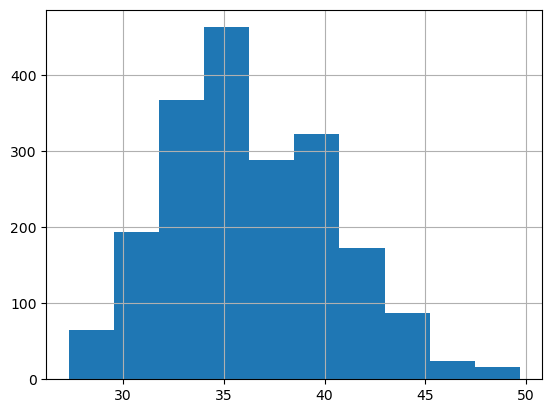

In [79]:
n=2000
print("Taking a sample of {n} waist sizes.")
s20 = waist.sample(n=n, replace=True)
sample_mean = s20.mean()
print(f"sample mean: {sample_mean:.3f}")
sample_stddev = s20.std(ddof=1)
print(f"sample standard deviation: {sample_stddev:.3f}")
sampling_error = sample_stddev / math.sqrt(n)
print(f"sampling error is sample standard deviation divided by sqrt(n): {sampling_error:.3f}")
tstar = t.ppf(0.975, n-1)
print(f"t distribution critical value (95\% confidence): {tstar:.3f}")
print(f"(whereas normal distribution critical value: {norm.ppf(0.975):.3f})")
margin_error = tstar * sampling_error
print("confidence interval (95\% confidence):")
print(f"({sample_mean-margin_error:.3f}, {sample_mean+margin_error:.3f})")
s20.hist();